Predictive Maintenance for IoT Machines

In [48]:
# 1. Install & Import Libraries
!pip install pandas numpy scikit-learn tensorflow matplotlib seaborn

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [49]:
# 2. Load your dataset
dataset_path = "/content/ai4i2020.csv"   # <-- make sure you uploaded ai4i2020.csv to Colab
df = pd.read_csv(dataset_path)

# Display top 5 rows
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [50]:
# 3. Check Info & Missing Values
# Basic dataset info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Data types
df.info()


Dataset Shape: (10000, 14)

Missing Values:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int6

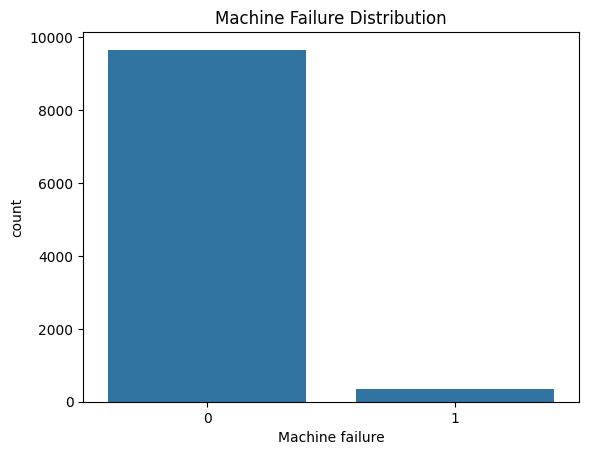

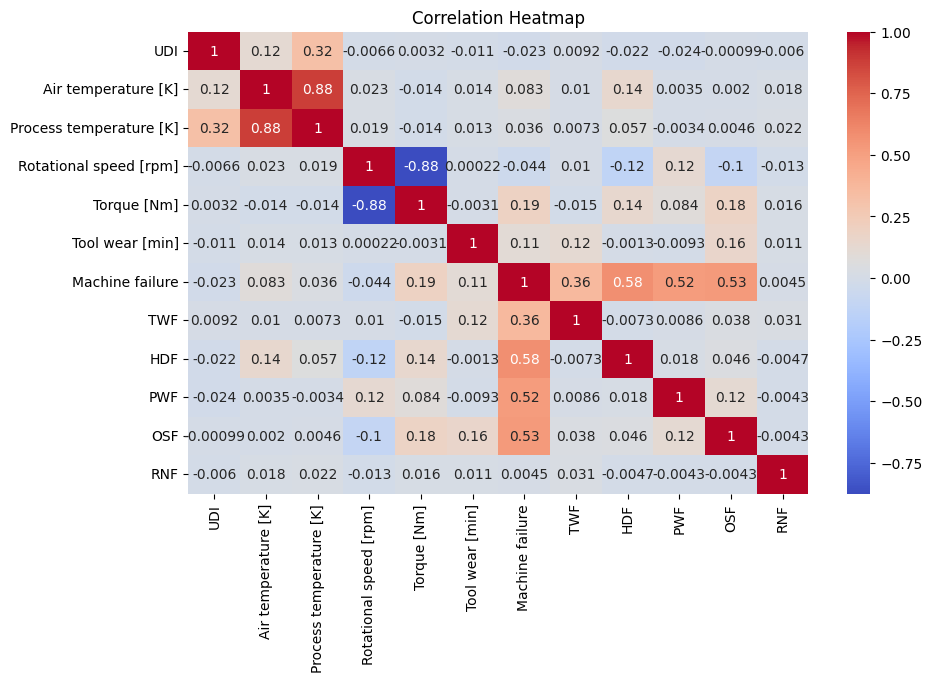

In [51]:
# 4. Exploratory Data Analysis (EDA)
# Describe numeric columns
df.describe()

# Plot distribution of Target (failure)
sns.countplot(x='Machine failure', data=df)
plt.title("Machine Failure Distribution")
plt.show()

# Check correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [52]:
# 5. Preprocessing
# Encode 'Type' (categorical)
encoder = LabelEncoder()
df['Type'] = encoder.fit_transform(df['Type'])

# Features (X) and Target (y)
X = df.drop(['Machine failure', 'Product ID', 'UDI'], axis=1)
y = df['Machine failure']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (8000, 11)
Test shape: (2000, 11)


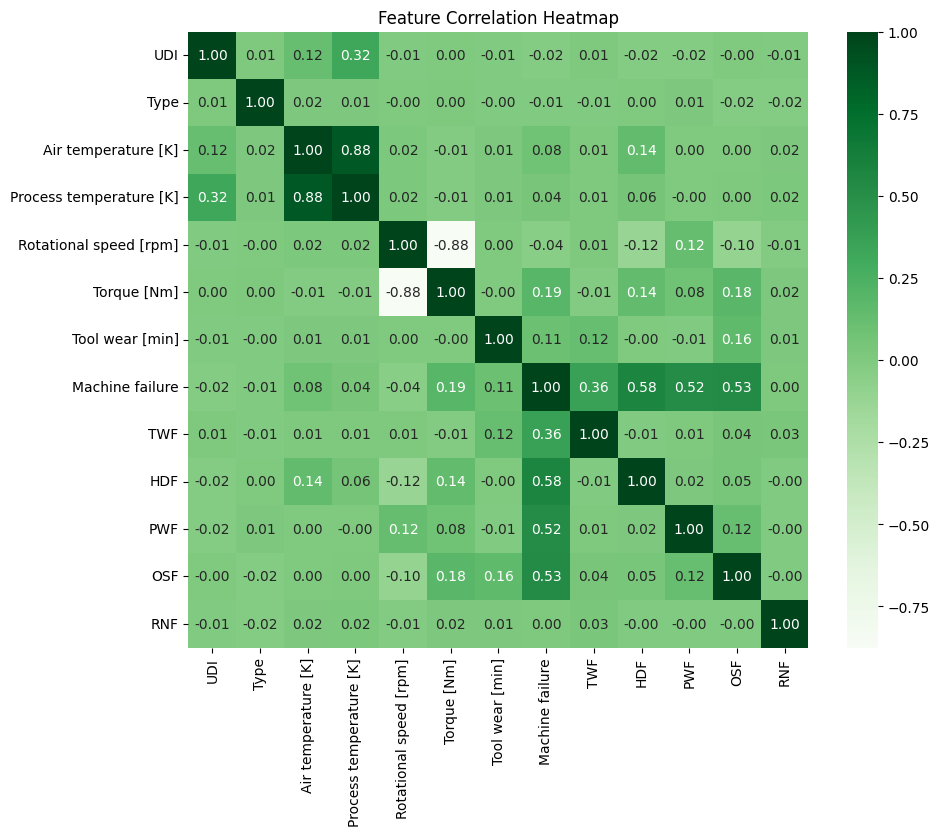

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [55]:
# 6.Build Deep Learning Model
# Build a simple ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# 7.Train the Model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7550 - loss: 0.4668 - val_accuracy: 0.9981 - val_loss: 0.0258
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9962 - loss: 0.0289 - val_accuracy: 0.9981 - val_loss: 0.0153
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9984 - loss: 0.0130 - val_accuracy: 0.9981 - val_loss: 0.0162
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9993 - loss: 0.0058 - val_accuracy: 0.9981 - val_loss: 0.0174
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9991 - loss: 0.0085 - val_accuracy: 0.9981 - val_loss: 0.0183
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9989 - loss: 0.0128 - val_accuracy: 0.9981 - val_loss: 0.0189
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0072 - val_accuracy: 0.9981 - val_loss: 0.0193
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 0.

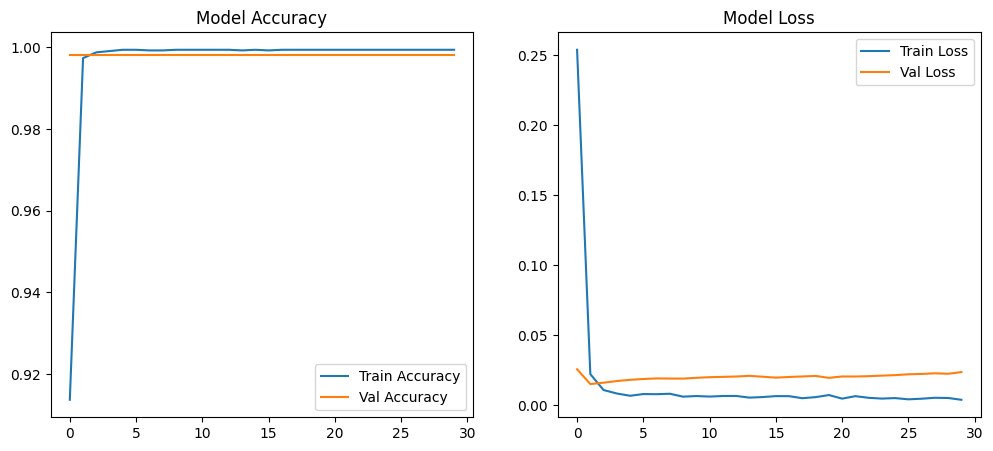

In [57]:
# 8. Plot Tarining Results
# Plot accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.999

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



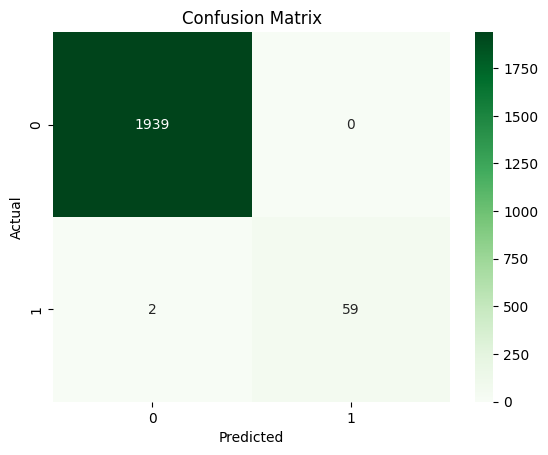

In [58]:
# 9. Model Evaluation
# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


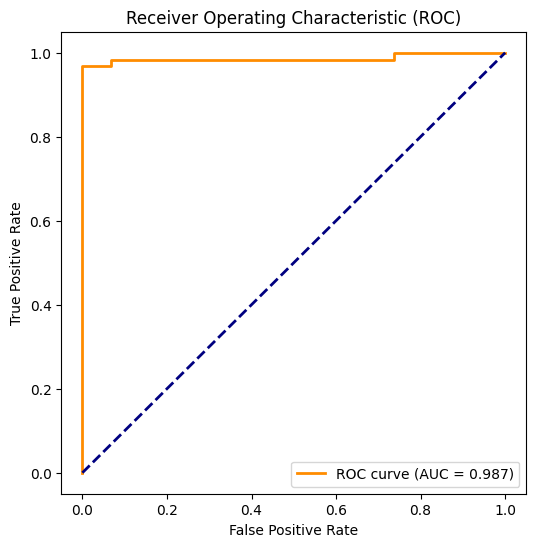

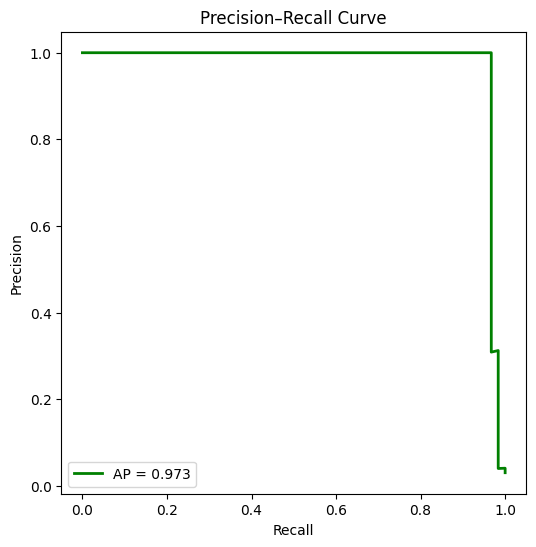

In [59]:
# === ROC Curve and Precision–Recall Curve ===
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_proba = model.predict(X_test)  # gives probabilities between 0–1

# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# --- Precision–Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='green', lw=2, label=f'AP = {avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [60]:
# 10. Predict on New Data
# Example machine data with all 11 features (in same order as training)
sample = np.array([[1, 0, 298.1, 308.5, 1550, 42.5, 185, 0, 0, 0, 0]])
# Columns: [UDI, Type, AirTemp, ProcessTemp, RotSpeed, Torque, ToolWear, TWF, HDF, PWF, OSF]

sample_scaled = scaler.transform(sample)
pred = model.predict(sample_scaled)
print("Failure Probability:", float(pred[0][0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Failure Probability: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
# === Saving the Trained Model ===
model.save("Predictive_Maintenance_Model.h5")
print("✅ Model saved successfully as 'Predictive_Maintenance_Model.h5'")



✅ Model saved successfully as 'Predictive_Maintenance_Model.h5'


## Conclusion
The deep learning-based predictive maintenance system successfully predicts potential machine failures with an accuracy of 99.9%.  
The model demonstrates strong generalization capability and can be integrated into IoT-based monitoring environments for early fault detection and preventive maintenance.
